In [1]:
import pandas as pd

In [2]:
file = pd.read_csv("C:\\Users\\HP\\Desktop\\airquality1.csv")
file.head(10)

,Unnamed: 0,Ozone,Solar.R,Wind,Temp,Month,Day,humidity
0,1,41.0,190.0,7.4,67,5,1,high
1,2,36.0,118.0,8.0,72,5,2,high
2,3,12.0,149.0,12.6,74,5,3,high
3,4,18.0,313.0,11.5,62,5,4,high
4,5,NaN,NaN,14.3,56,5,5,high
5,6,28.0,NaN,14.9,66,5,6,high
6,7,23.0,299.0,8.6,65,5,7,low
7,8,19.0,99.0,13.8,59,5,8,low
8,9,8.0,19.0,20.1,61,5,9,low
9,10,NaN,194.0,8.6,69,5,10,low


In [3]:
file.isnull().sum()

Unnamed: 0     0
Ozone         37
Solar.R        7
Wind           0
Temp           0
Month          0
Day            0
humidity       4
dtype: int64

In [4]:
df = file.drop("Unnamed: 0", axis=1)

In [5]:
df["Ozone"] = df["Ozone"].fillna(df["Ozone"].mean())
df["Solar.R"] = df["Solar.R"].fillna(df["Solar.R"].mean())
df["Wind"] = df["Wind"].fillna(df["Wind"].mean())

In [6]:
df["humidity"] = df["humidity"].fillna(df["humidity"].mode()[0])
df.dtypes

Ozone       float64
Solar.R     float64
Wind        float64
Temp          int64
Month         int64
Day           int64
humidity     object
dtype: object

In [7]:
df.isnull().sum()

Ozone       0
Solar.R     0
Wind        0
Temp        0
Month       0
Day         0
humidity    0
dtype: int64

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
le = LabelEncoder()

In [10]:
 df["humidity"] = le.fit_transform(df["humidity"])

In [11]:
df["humidity"].unique()

array([0, 1, 2])

In [12]:
df.dtypes

Ozone       float64
Solar.R     float64
Wind        float64
Temp          int64
Month         int64
Day           int64
humidity      int32
dtype: object

In [13]:
s1 = df.iloc[[1,2,3,6,12,28],:]
s1

,Ozone,Solar.R,Wind,Temp,Month,Day,humidity
1,36.0,118.0,8.0,72,5,2,0
2,12.0,149.0,12.6,74,5,3,0
3,18.0,313.0,11.5,62,5,4,0
6,23.0,299.0,8.6,65,5,7,1
12,11.0,290.0,9.2,66,5,13,1
28,45.0,252.0,14.9,81,5,29,2


In [14]:
s2 = df.iloc[[70,81,95,105,123,137,149],:]
s2

,Ozone,Solar.R,Wind,Temp,Month,Day,humidity
70,85.00000,175.000000,7.4,89,7,10,2
81,16.00000,7.000000,6.9,74,7,21,0
95,78.00000,185.931507,6.9,86,8,4,0
105,65.00000,157.000000,9.7,80,8,14,1
123,96.00000,167.000000,6.9,91,9,1,0
137,13.00000,112.000000,11.5,71,9,15,0
149,42.12931,145.000000,13.2,77,9,27,0


In [15]:
merge = pd.concat([s1,s2])

In [16]:
merge

,Ozone,Solar.R,Wind,Temp,Month,Day,humidity
1,36.00000,118.000000,8.0,72,5,2,0
2,12.00000,149.000000,12.6,74,5,3,0
3,18.00000,313.000000,11.5,62,5,4,0
6,23.00000,299.000000,8.6,65,5,7,1
12,11.00000,290.000000,9.2,66,5,13,1
28,45.00000,252.000000,14.9,81,5,29,2
70,85.00000,175.000000,7.4,89,7,10,2
81,16.00000,7.000000,6.9,74,7,21,0
95,78.00000,185.931507,6.9,86,8,4,0
105,65.00000,157.000000,9.7,80,8,14,1


In [17]:
corr = df.corr()

In [18]:
corr

,Ozone,Solar.R,Wind,Temp,Month,Day,humidity
Ozone,1.000000,0.302970,-0.530936,0.608742,0.149081,-0.011355,0.155033
Solar.R,0.302970,1.000000,-0.055245,0.262569,-0.072904,-0.145621,-0.007810
Wind,-0.530936,-0.055245,1.000000,-0.457988,-0.178293,0.027181,-0.069561
Temp,0.608742,0.262569,-0.457988,1.000000,0.420947,-0.130593,0.013594
Month,0.149081,-0.072904,-0.178293,0.420947,1.000000,-0.007962,-0.188220
Day,-0.011355,-0.145621,0.027181,-0.130593,-0.007962,1.000000,0.091986
humidity,0.155033,-0.007810,-0.069561,0.013594,-0.188220,0.091986,1.000000


<AxesSubplot:>

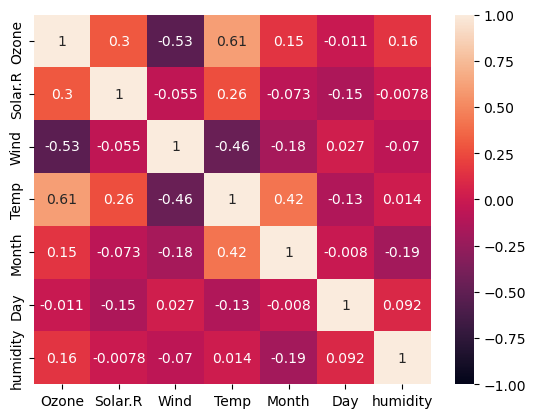

In [19]:
import seaborn as sns
sns.heatmap(corr, vmin = -1, vmax = 1, annot=True)

In [20]:
x = df[["Ozone"]]
y = df[["Temp"]]

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3)

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
lr = LinearRegression()

In [25]:
model = lr.fit(xtrain, ytrain)

In [26]:
ypredict = model.predict(xtest)

In [27]:
import matplotlib.pyplot as plt

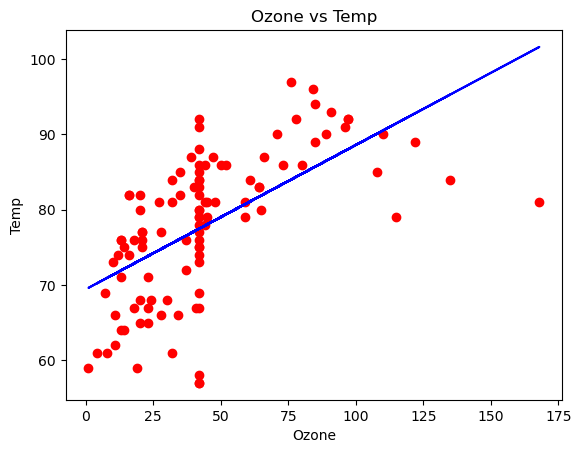

In [28]:
plt.scatter(xtrain, ytrain, color="red")
plt.plot(xtrain, lr.predict(xtrain), color="blue")
plt.xlabel("Ozone")
plt.ylabel("Temp")
plt.title("Ozone vs Temp")
plt.show()

In [29]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import numpy as np

In [30]:
MSE = mean_squared_error(ytest,ypredict)
MAE = mean_absolute_error(ytest,ypredict)
r2_score = r2_score(ytest,ypredict)
RMSE = np.sqrt(MSE)

In [31]:
print("MSE : {} \nRMSE : {} \nMAE : {} \nR2 Score : {}".format(MSE, RMSE, MAE, r2_score))

MSE : 51.02370791583273 
RMSE : 7.143088121802274 
MAE : 5.289378873060369 
R2 Score : 0.3827859599834096
